<a href="https://colab.research.google.com/github/ArpanChaudhary/ML_Project/blob/main/Insurance_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/insurance_fraud.csv')

df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [4]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df = df.drop(columns='_c39')

In [6]:
df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df['authorities_contacted'].mode()

0    Police
Name: authorities_contacted, dtype: object

In [9]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode())

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lab_enc = LabelEncoder()

In [12]:
df['policy_bind_date'] = lab_enc.fit_transform(df['policy_bind_date'])

In [13]:
df['policy_state'] = lab_enc.fit_transform(df['policy_state'])

In [14]:
df['policy_csl'] = lab_enc.fit_transform(df['policy_csl'])

In [15]:
df['insured_sex'] = lab_enc.fit_transform(df['insured_sex'])

In [16]:
df['insured_education_level'] = lab_enc.fit_transform(df['insured_education_level'])

In [17]:
df['insured_occupation'] = lab_enc.fit_transform(df['insured_occupation'])

In [18]:
df['insured_hobbies'] = lab_enc.fit_transform(df['insured_hobbies'])

In [19]:
df['insured_relationship'] = lab_enc.fit_transform(df['insured_relationship'])

In [20]:
df['incident_date'] = lab_enc.fit_transform(df['incident_date'])

In [21]:
df['incident_type'] = lab_enc.fit_transform(df['incident_type'])

In [22]:
df['incident_severity'] = lab_enc.fit_transform(df['incident_severity'])

In [23]:
df['collision_type'] = lab_enc.fit_transform(df['collision_type'])

In [24]:
df['authorities_contacted'] = lab_enc.fit_transform(df['authorities_contacted'])

In [25]:
df['incident_state'] = lab_enc.fit_transform(df['incident_state'])

In [26]:
df['incident_city'] = lab_enc.fit_transform(df['incident_city'])

In [27]:
df['incident_location'] = lab_enc.fit_transform(df['incident_location'])

In [28]:
df['property_damage'] = lab_enc.fit_transform(df['property_damage'])

In [29]:
df['police_report_available'] = lab_enc.fit_transform(df['police_report_available'])

In [30]:
df['auto_make'] = lab_enc.fit_transform(df['auto_make'])

In [31]:
df['auto_model'] = lab_enc.fit_transform(df['auto_model'])

In [32]:
df['fraud_reported'] = lab_enc.fit_transform(df['fraud_reported'])

In [33]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

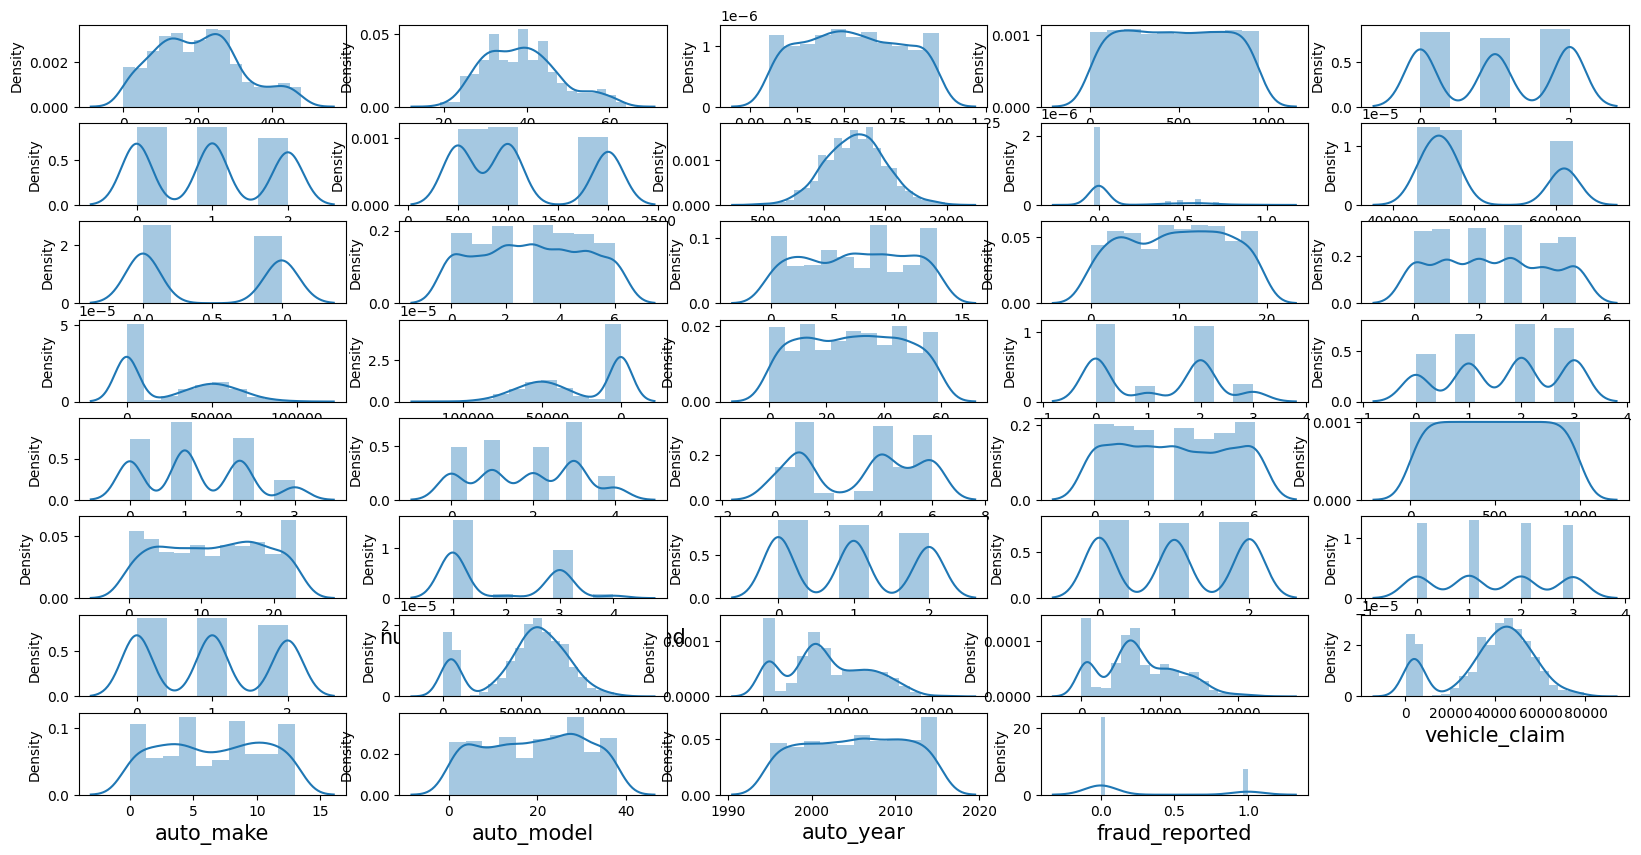

In [35]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
  if plotnumber<=40:
    ax=plt.subplot(8,5,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)

  plotnumber+=1
plt.show()

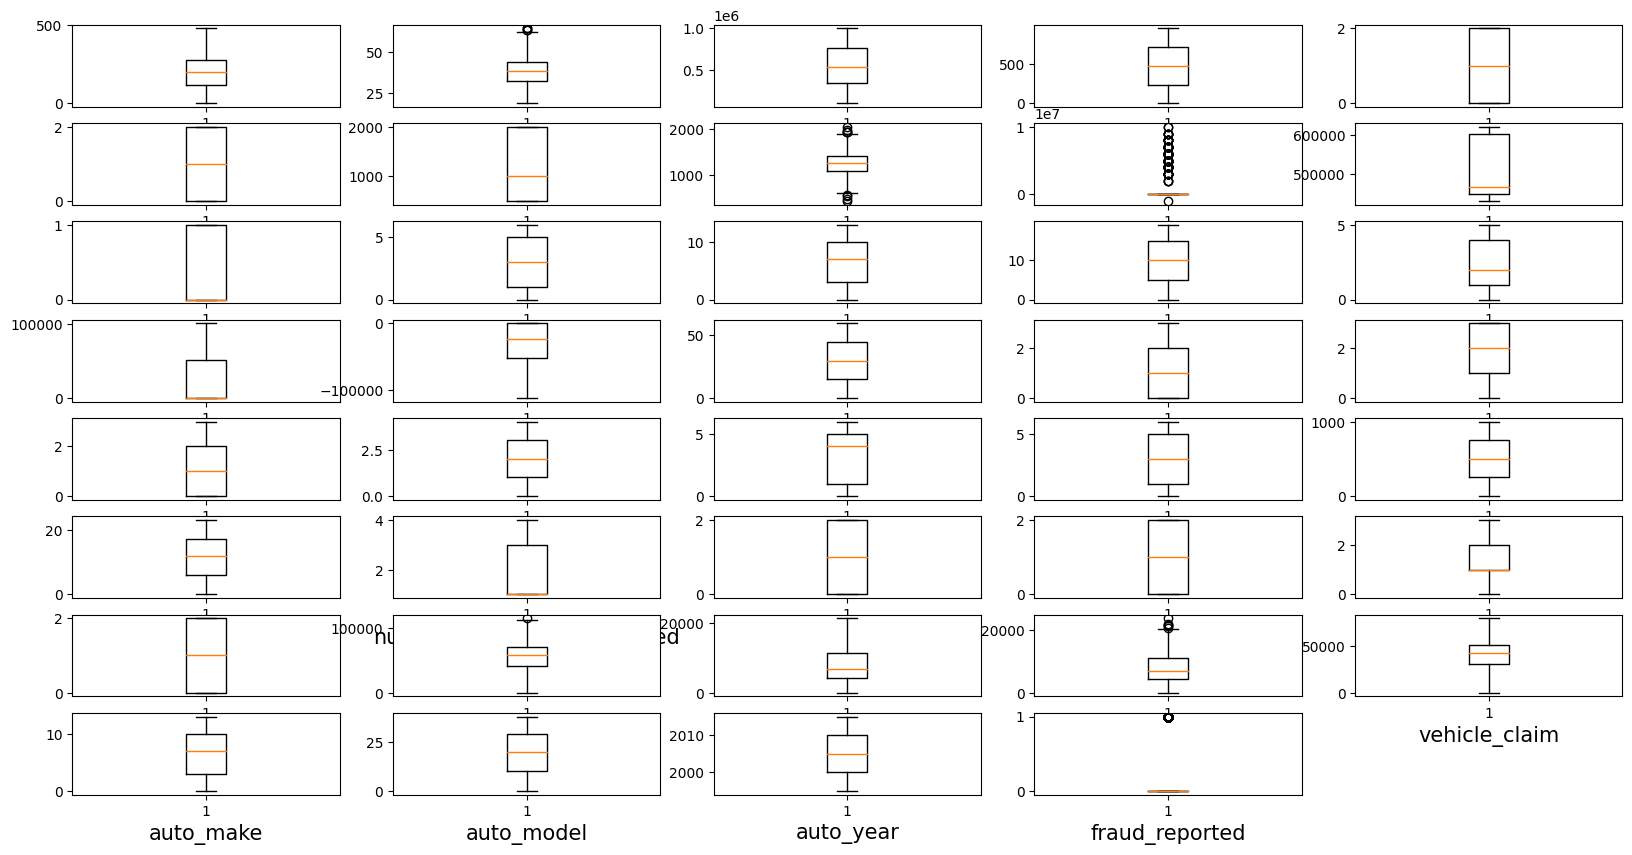

In [36]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in df:
  if plotnumber<=40:
    ax=plt.subplot(8,5,plotnumber)
    plt.boxplot(df[column])
    plt.xlabel(column,fontsize=15)

  plotnumber+=1
plt.show()

In [37]:
from scipy.stats import zscore

In [38]:
x = df.drop(columns='fraud_reported')

y = df['fraud_reported']

In [39]:
z_score = zscore(x)

z_score = np.abs(z_score)

filter_entry = (z_score < 3).all(axis=1)

x = x[filter_entry]

x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,0,1,2,46980,5220,5220,36540,1,5,1998


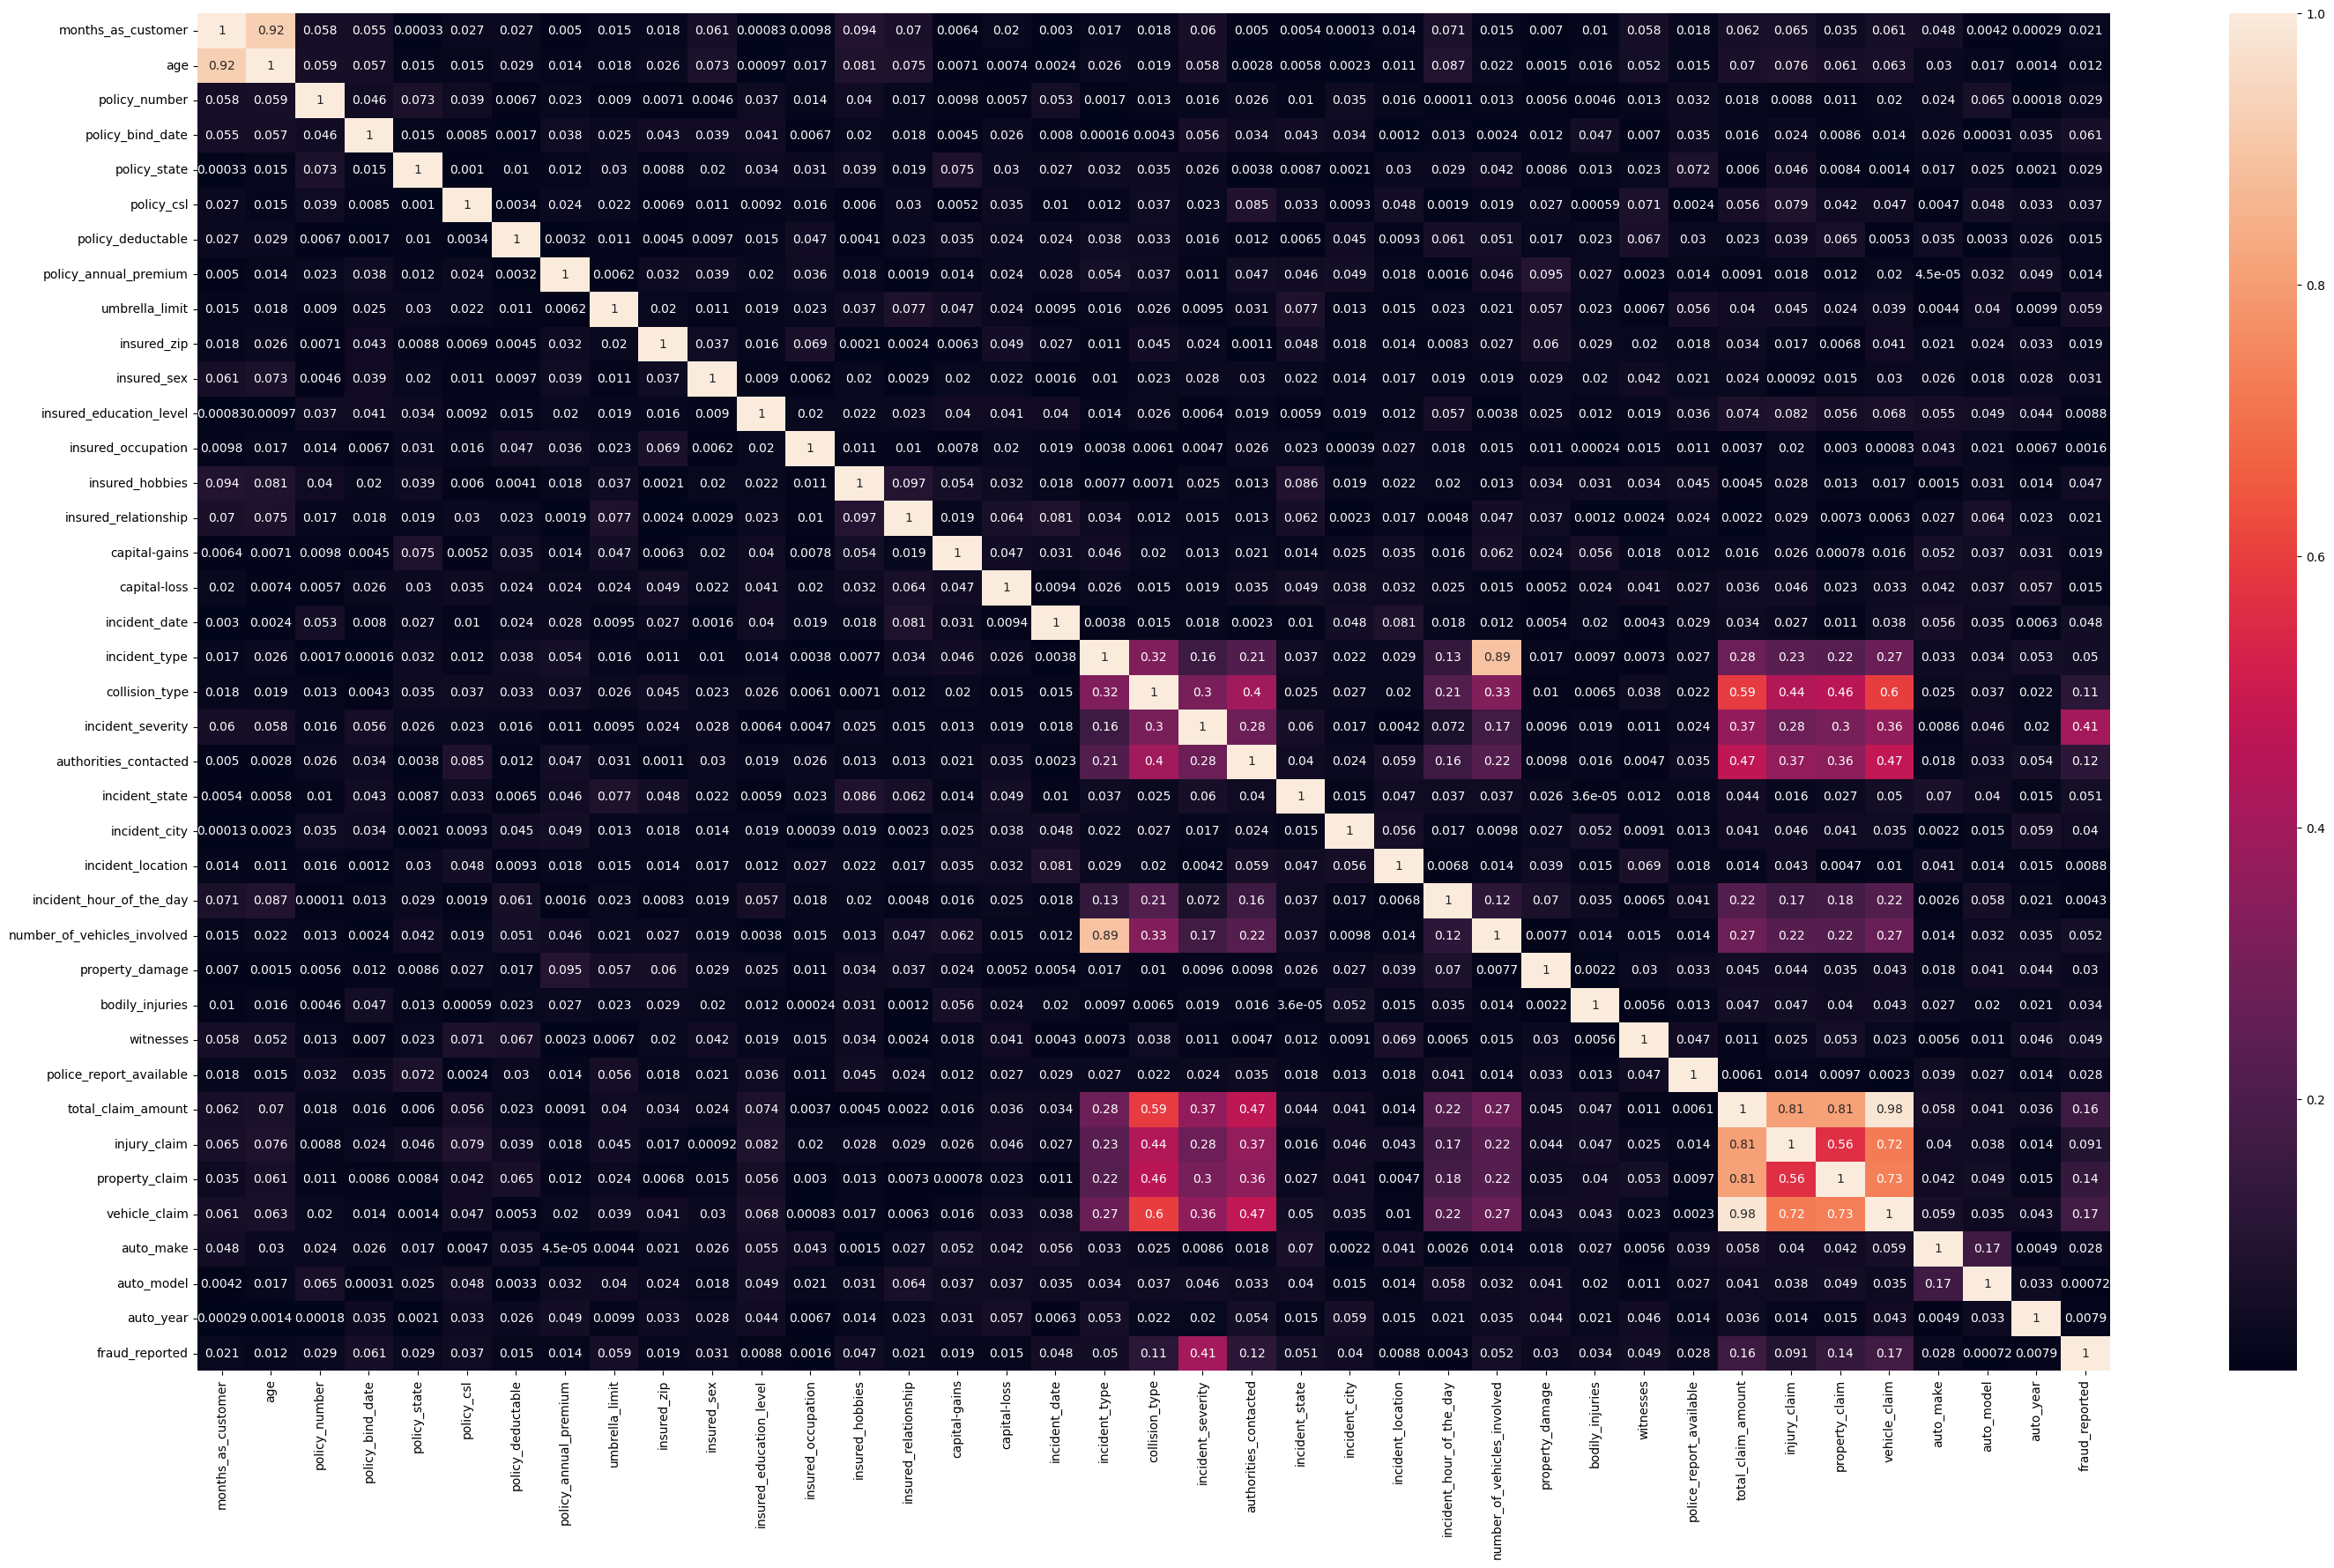

In [40]:
corr = df.corr().abs()

plt.figure(figsize=(35,20))

sns.heatmap(corr,annot=True)

plt.show()

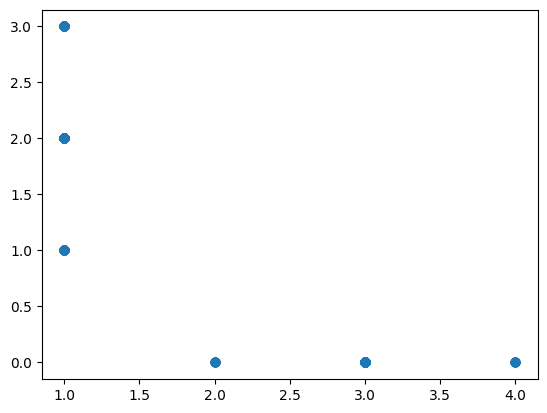

In [41]:
plt.scatter(x.number_of_vehicles_involved,x.incident_type)

plt.show()

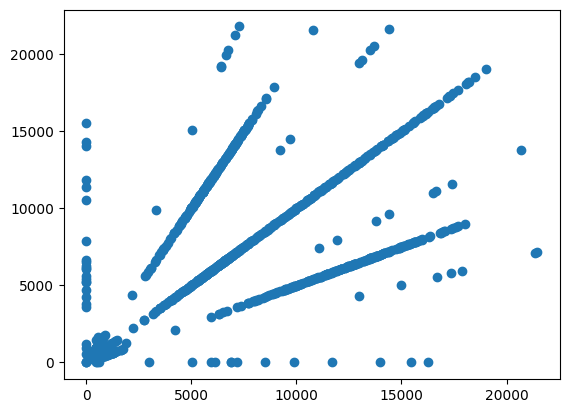

In [42]:
plt.scatter(x.injury_claim,x.property_claim)

plt.show()

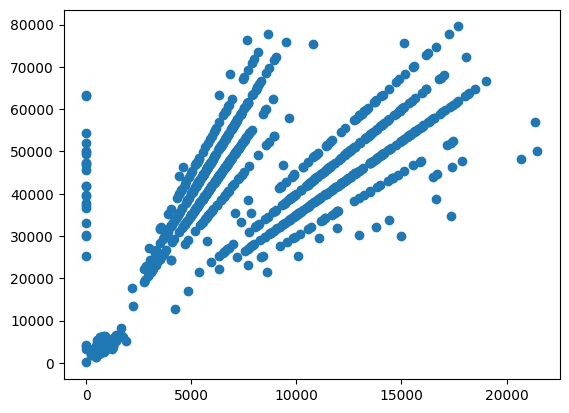

In [43]:
plt.scatter(x.injury_claim,x.vehicle_claim)

plt.show()

In [44]:
x = df.drop(columns=['incident_type','injury_claim','vehicle_claim'])


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25)

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [50]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

lr_pred = lr.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test,lr_pred)

accuracy

1.0

In [52]:
confusion_matrix(y_test,lr_pred)

array([[193,   0],
       [  0,  57]])

In [53]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        57

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [54]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

dt_pred = dt.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test,dt_pred)

accuracy

1.0

In [56]:
confusion_matrix(y_test,dt_pred)

array([[193,   0],
       [  0,  57]])

In [57]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        57

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [58]:
# Hyperparameter for Decision tree Classifier


from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['entropy','gini'],'max_depth':range(10,25),'max_leaf_nodes':range(10,20),'min_samples_split':range(10,18)}

grdsrch = GridSearchCV(dt, param_grid=param_grid, cv=5)
grdsrch.fit(x_train,y_train)

param = grdsrch.best_params_

param

{'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 10,
 'min_samples_split': 10}

In [59]:
Dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=10,min_samples_split=10)
Dt.fit(x_train,y_train)

Dt_pred = Dt.predict(x_test)

In [60]:
accuracy = accuracy_score(y_test,Dt_pred)

accuracy

1.0

In [61]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

rf_pred = rf.predict(x_test)

In [62]:
accuracy = accuracy_score(y_test,rf_pred)

accuracy

1.0

In [63]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        57

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [64]:
# hyperparameter tuning for Random Forest Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['entropy','gini'],'max_depth':[10,14],'max_leaf_nodes':[10,15],'min_samples_split':[10,14],'n_estimators':[10,14]}

grdsrch = GridSearchCV(rf, param_grid=param_grid)
grdsrch.fit(x_train,y_train)

params = grdsrch.best_params_



In [65]:
params

{'criterion': 'gini',
 'max_depth': 14,
 'max_leaf_nodes': 15,
 'min_samples_split': 10,
 'n_estimators': 14}

In [66]:
Rf = RandomForestClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=10,min_samples_split=14,n_estimators=14)

Rf.fit(x_train,y_train)

Rf_pred = Rf.predict(x_test)

In [67]:
accuracy = accuracy_score(y_test,Rf_pred)

accuracy

0.98

In [68]:
svc = SVC()

svc.fit(x_train,y_train)

svc_pred = svc.predict(x_test)

In [69]:
accuracy = accuracy_score(y_test,svc_pred)
accuracy

1.0

In [70]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        57

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [71]:
# import pickle

# pickle.dump(rf,open('rf_classifier','wb'))